In [36]:
import pandas as pd

df = pd.read_csv('/content/Admission_Predict.csv')

In [37]:
# Представление данных
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [38]:
# Размерность данных
df.shape

(400, 9)

In [39]:
# Статистическая информация о данных
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [40]:
# Проверка на наличие пустых значений
df.isnull().sum()

,0
Serial No.,0
GRE Score,0
TOEFL Score,0
University Rating,0
SOP,0
LOR,0
CGPA,0
Research,0
Chance of Admit,0


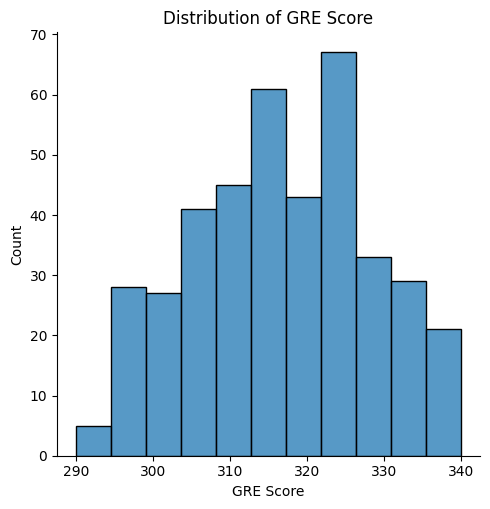

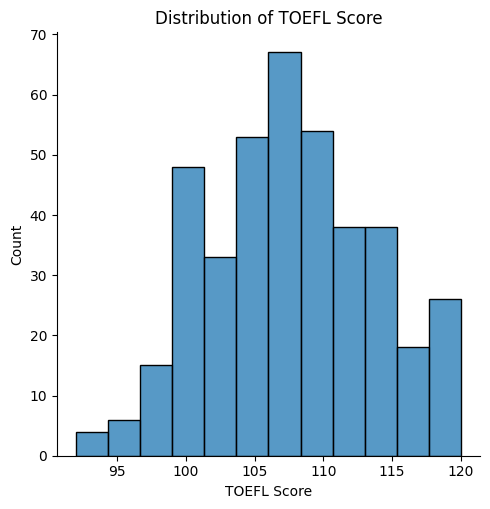

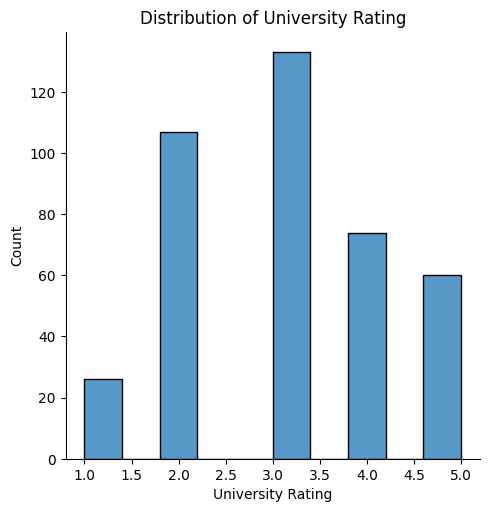

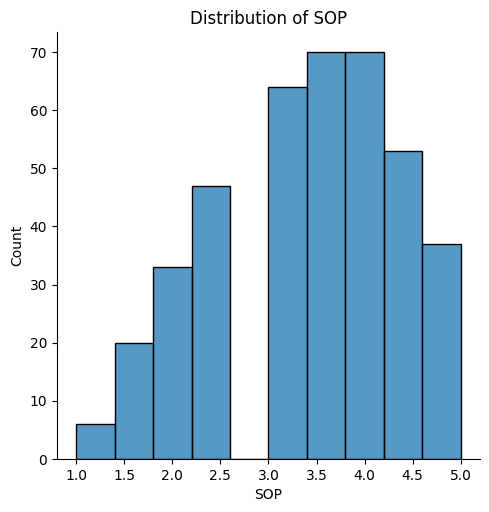

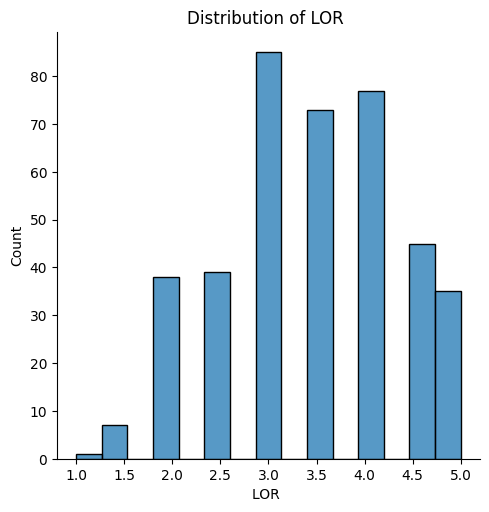

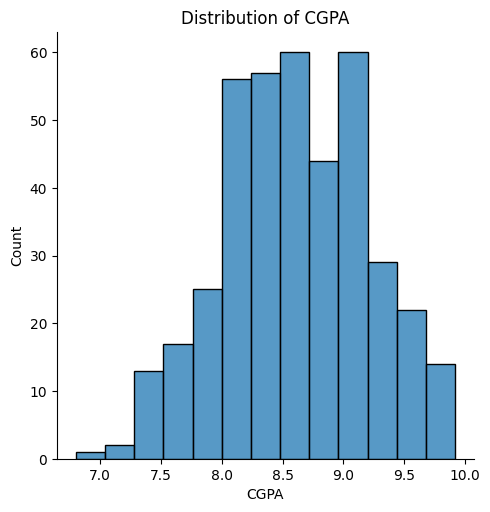

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Визуализация данных (столбчатые диаграммы)
for column in df.columns[1:7]:
  fig = sns.displot(df[column])
  plt.title(f'Distribution of {column}')
  plt.show()

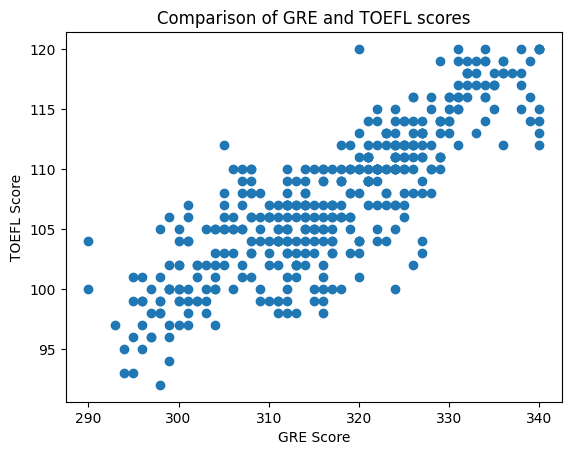

In [42]:
# Сравнение результатов GRE и TOEFL
plt.scatter(df['GRE Score'], df['TOEFL Score'])
plt.xlabel('GRE Score')
plt.ylabel('TOEFL Score')
plt.title('Comparison of GRE and TOEFL scores')
plt.show()

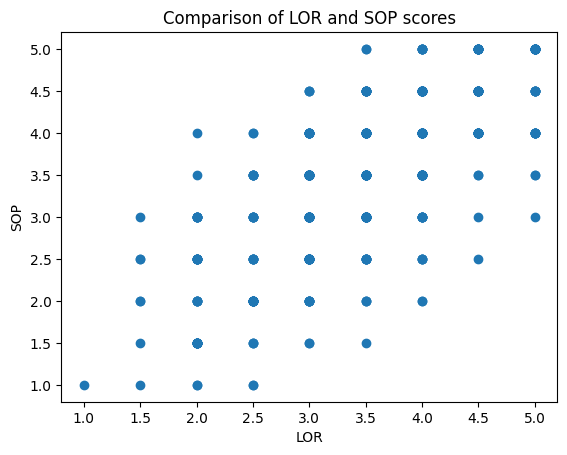

In [43]:
# Проверка зависимости оцененной рекомендации и оцененного мотивационного письма
plt.scatter(df['LOR '], df['SOP'])
plt.xlabel('LOR')
plt.ylabel('SOP')
plt.title('Comparison of LOR and SOP scores')
plt.show()

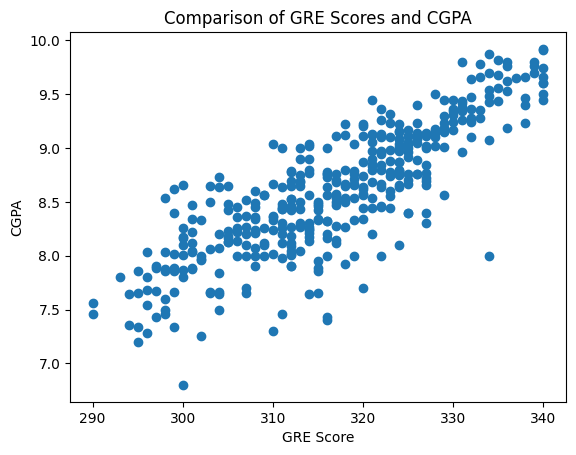

In [44]:
# Сравнение результатов GRE и среднего балла аттестата (диплома)
plt.scatter(df['GRE Score'], df['CGPA'])
plt.xlabel('GRE Score')
plt.ylabel('CGPA')
plt.title('Comparison of GRE Scores and CGPA')
plt.show()

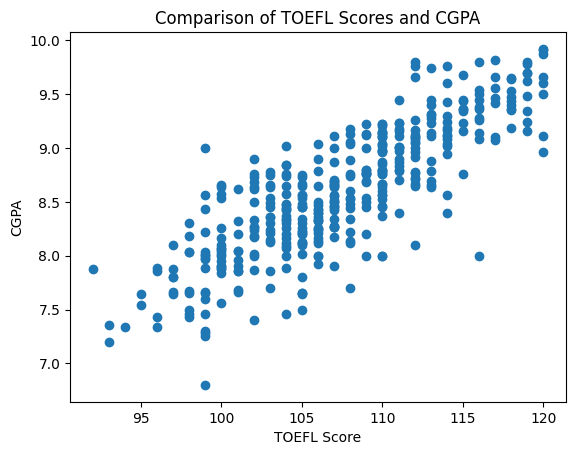

In [45]:
# Сравнение результатов TOEFL и среднего балла аттестата (диплома)
plt.scatter(df['TOEFL Score'], df['CGPA'])
plt.xlabel('TOEFL Score')
plt.ylabel('CGPA')
plt.title('Comparison of TOEFL Scores and CGPA')
plt.show()

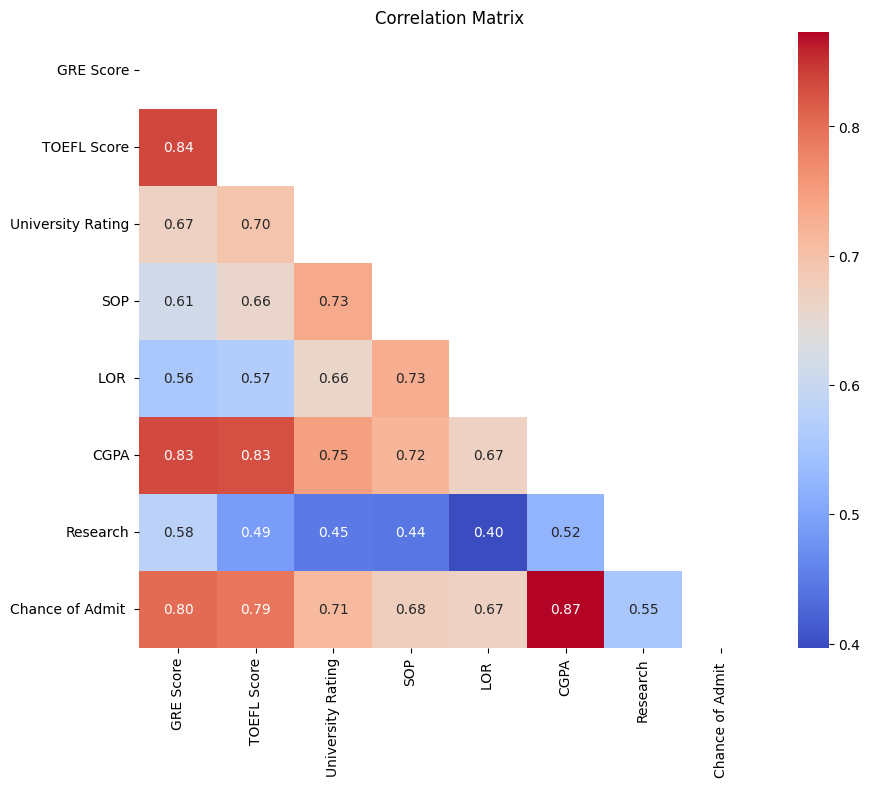

In [46]:
# Корреляция признаков
import numpy as np

df = df.drop('Serial No.', axis=1)

correlation = df.corr()

mask = np.triu(np.ones_like(correlation))

plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f",mask=mask)
plt.title('Correlation Matrix')
plt.show()

In [47]:
# Подготовка к обучению моделей
from sklearn.model_selection import train_test_split

X = df.drop(['Chance of Admit '], axis = 1)
y = df['Chance of Admit ']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
from sklearn.metrics import mean_squared_error, mean_absolute_error ,r2_score

In [49]:
!pip install catboost

In [50]:
# Импорт регрессоров
from sklearn.ensemble import GradientBoostingRegressor, ExtraTreesRegressor, RandomForestRegressor, AdaBoostRegressor, VotingRegressor
from sklearn.linear_model import Lasso, Ridge, BayesianRidge, LinearRegression, HuberRegressor, ElasticNet, PassiveAggressiveRegressor, OrthogonalMatchingPursuit
from sklearn.neighbors import KNeighborsRegressor
from sklearn.dummy import DummyRegressor
from sklearn.tree import DecisionTreeRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

In [51]:
# Обучение регрессоров
regressors = {
    "Gradient Boosting": GradientBoostingRegressor(),
    "LGBM": LGBMRegressor(),
    "XGBoost": XGBRegressor(),
    "Extra Trees": ExtraTreesRegressor(),
    "Random Forest": RandomForestRegressor(),
    "CatBoost": CatBoostRegressor(),
    "AdaBoost": AdaBoostRegressor(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "Bayesian Ridge": BayesianRidge(),
    "Linear Regression": LinearRegression(),
    "Huber Regressor": HuberRegressor(),
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "Orthogonal Matching Pursuit": OrthogonalMatchingPursuit(),
    "Passive-Agressive Regressor": PassiveAggressiveRegressor(),
    "K-Nearest Neighbors": KNeighborsRegressor(),
    "Dummy": DummyRegressor(),
    "Elastic Net": ElasticNet(),
    "Voting Regressor": VotingRegressor(estimators=[('lr', LinearRegression()), ('dt', DecisionTreeRegressor()), ('rf', RandomForestRegressor())])
}

results = [] # Создание списка для последующего добавления полученных данных
for name, regressor in regressors.items():
  regressor.fit(X_train, y_train)
  y_pred = regressor.predict(X_test)
  mse = mean_squared_error(y_test, y_pred)
  mae = mean_absolute_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)
  results.append([name, mse, mae, r2])

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000168 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 181
[LightGBM] [Info] Number of data points in the train set: 320, number of used features: 7
[LightGBM] [Info] Start training from score 0.725281
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_huber.py:343: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [52]:
# Создание таблицы для наглядного представления полученных данных
df_results = pd.DataFrame(results, columns=['Regressor', 'MSE', 'MAE', 'R2'])
df_results

,Regressor,MSE,MAE,R2
0,Gradient Boosting,0.005339,0.050205,0.793243
1,LGBM,0.005294,0.050514,0.794977
2,XGBoost,0.006052,0.055762,0.765631
3,Extra Trees,0.005299,0.051705,0.794809
4,Random Forest,0.004868,0.049269,0.811482
5,CatBoost,0.005124,0.050101,0.801566
6,AdaBoost,0.005398,0.058817,0.790966
7,Lasso,0.020342,0.113683,0.212258
8,Ridge,0.004637,0.048032,0.820434
9,Bayesian Ridge,0.004668,0.048174,0.819250


In [53]:
# Сортировка по столбцу R2
df_sorted = df_results.sort_values(by='R2', ascending=False)
df_sorted

,Regressor,MSE,MAE,R2
10,Linear Regression,0.004617,0.047957,0.821208
8,Ridge,0.004637,0.048032,0.820434
9,Bayesian Ridge,0.004668,0.048174,0.819250
4,Random Forest,0.004868,0.049269,0.811482
5,CatBoost,0.005124,0.050101,0.801566
1,LGBM,0.005294,0.050514,0.794977
3,Extra Trees,0.005299,0.051705,0.794809
0,Gradient Boosting,0.005339,0.050205,0.793243
6,AdaBoost,0.005398,0.058817,0.790966
18,Voting Regressor,0.005550,0.050807,0.785079


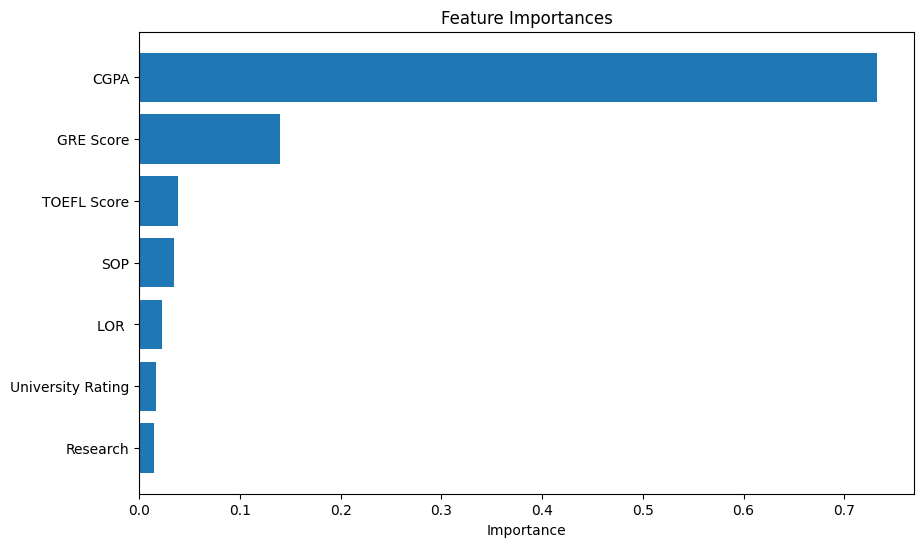

In [54]:
# Определение важности признаков

model = RandomForestRegressor()
model.fit(X_train, y_train)

importances = model.feature_importances_

features = X.columns
indices = np.argsort(importances)

plt.figure(figsize=(10,6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Importance')
plt.show()
